### Predeccion de juegos ganados en division Diamond en version cercana a la última

Obtenemos información de un csv descargado con ayuda de la siguiente API ->

In [1]:
#Utilidades y librerias del proyecto

API_KEY = "RGAPI-78d9d52a-3abc-415b-84a1-68145f33b1a3"
#pip install riotwatcher
# Link 1 -> https://riot-watcher.readthedocs.io/en/latest/index.html


In [2]:
from riotwatcher import LolWatcher, ApiError
lol_watcher = LolWatcher(API_KEY)
my_region = 'na1'

me = lol_watcher.summoner.by_name('na1', 'monkeee')
print(me)

# all objects are returned (by default) as a dict
# lets see if i got diamond yet (i probably didnt)
my_ranked_stats = lol_watcher.league.by_summoner(my_region, me['id'])
print(my_ranked_stats)

# First we get the latest version of the game from data dragon
versions = lol_watcher.data_dragon.versions_for_region(my_region)
champions_version = versions['n']['champion']

# Lets get some champions
#current_champ_list = lol_watcher.data_dragon.champions(champions_version)
#print(current_champ_list)


try:
    response = lol_watcher.summoner.by_name('na1', 'monkeee')
except ApiError as err:
    if err.response.status_code == 429:
        print('We should retry in {} seconds.'.format(err.headers['Retry-After']))
        print('this retry-after is handled by default by the RiotWatcher library')
        print('future requests wait until the retry-after time passes')
    elif err.response.status_code == 404:
        print('Summoner with that ridiculous name not found.')
    else:
        raise

{'id': 'cpZsztJMv2vQU63xdAbMW83RJN_okNrdMj3Go30g_6JrQVw', 'accountId': 'LKFRCQEA4wssP3gPf6y2NejlX4Kh1vMl0WipoAcWmiwqJ_4', 'puuid': 'lbPnrnqzLaSVI37YVERemh-TGvrbG551v0Gx11C2p8zv1hbBwjhEI9QBx-eFXyyWzurO93xt267MGg', 'name': 'Monkeee', 'profileIconId': 4798, 'revisionDate': 1676778024000, 'summonerLevel': 59}
[]


In [3]:
#importamos el archivo llamado high_diamond_ranked_10min.csv
import pandas as pd
df = pd.read_csv('high_diamond_ranked_10min.csv')
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


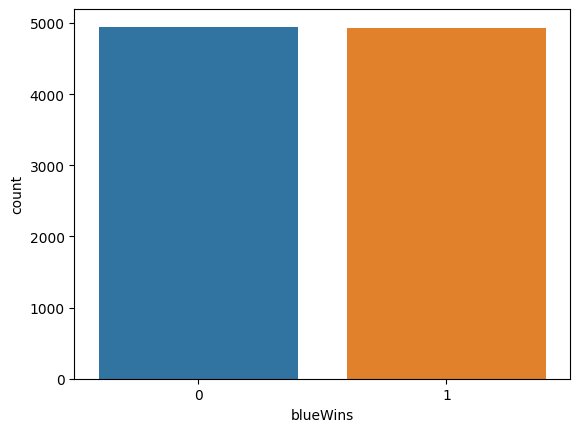

In [4]:
# contar los valores de la columna blueWins y los muestra en un grafico de barras 
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='blueWins', data=df)
plt.show()

In [5]:
#imprimimos los nombres de las columnas
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

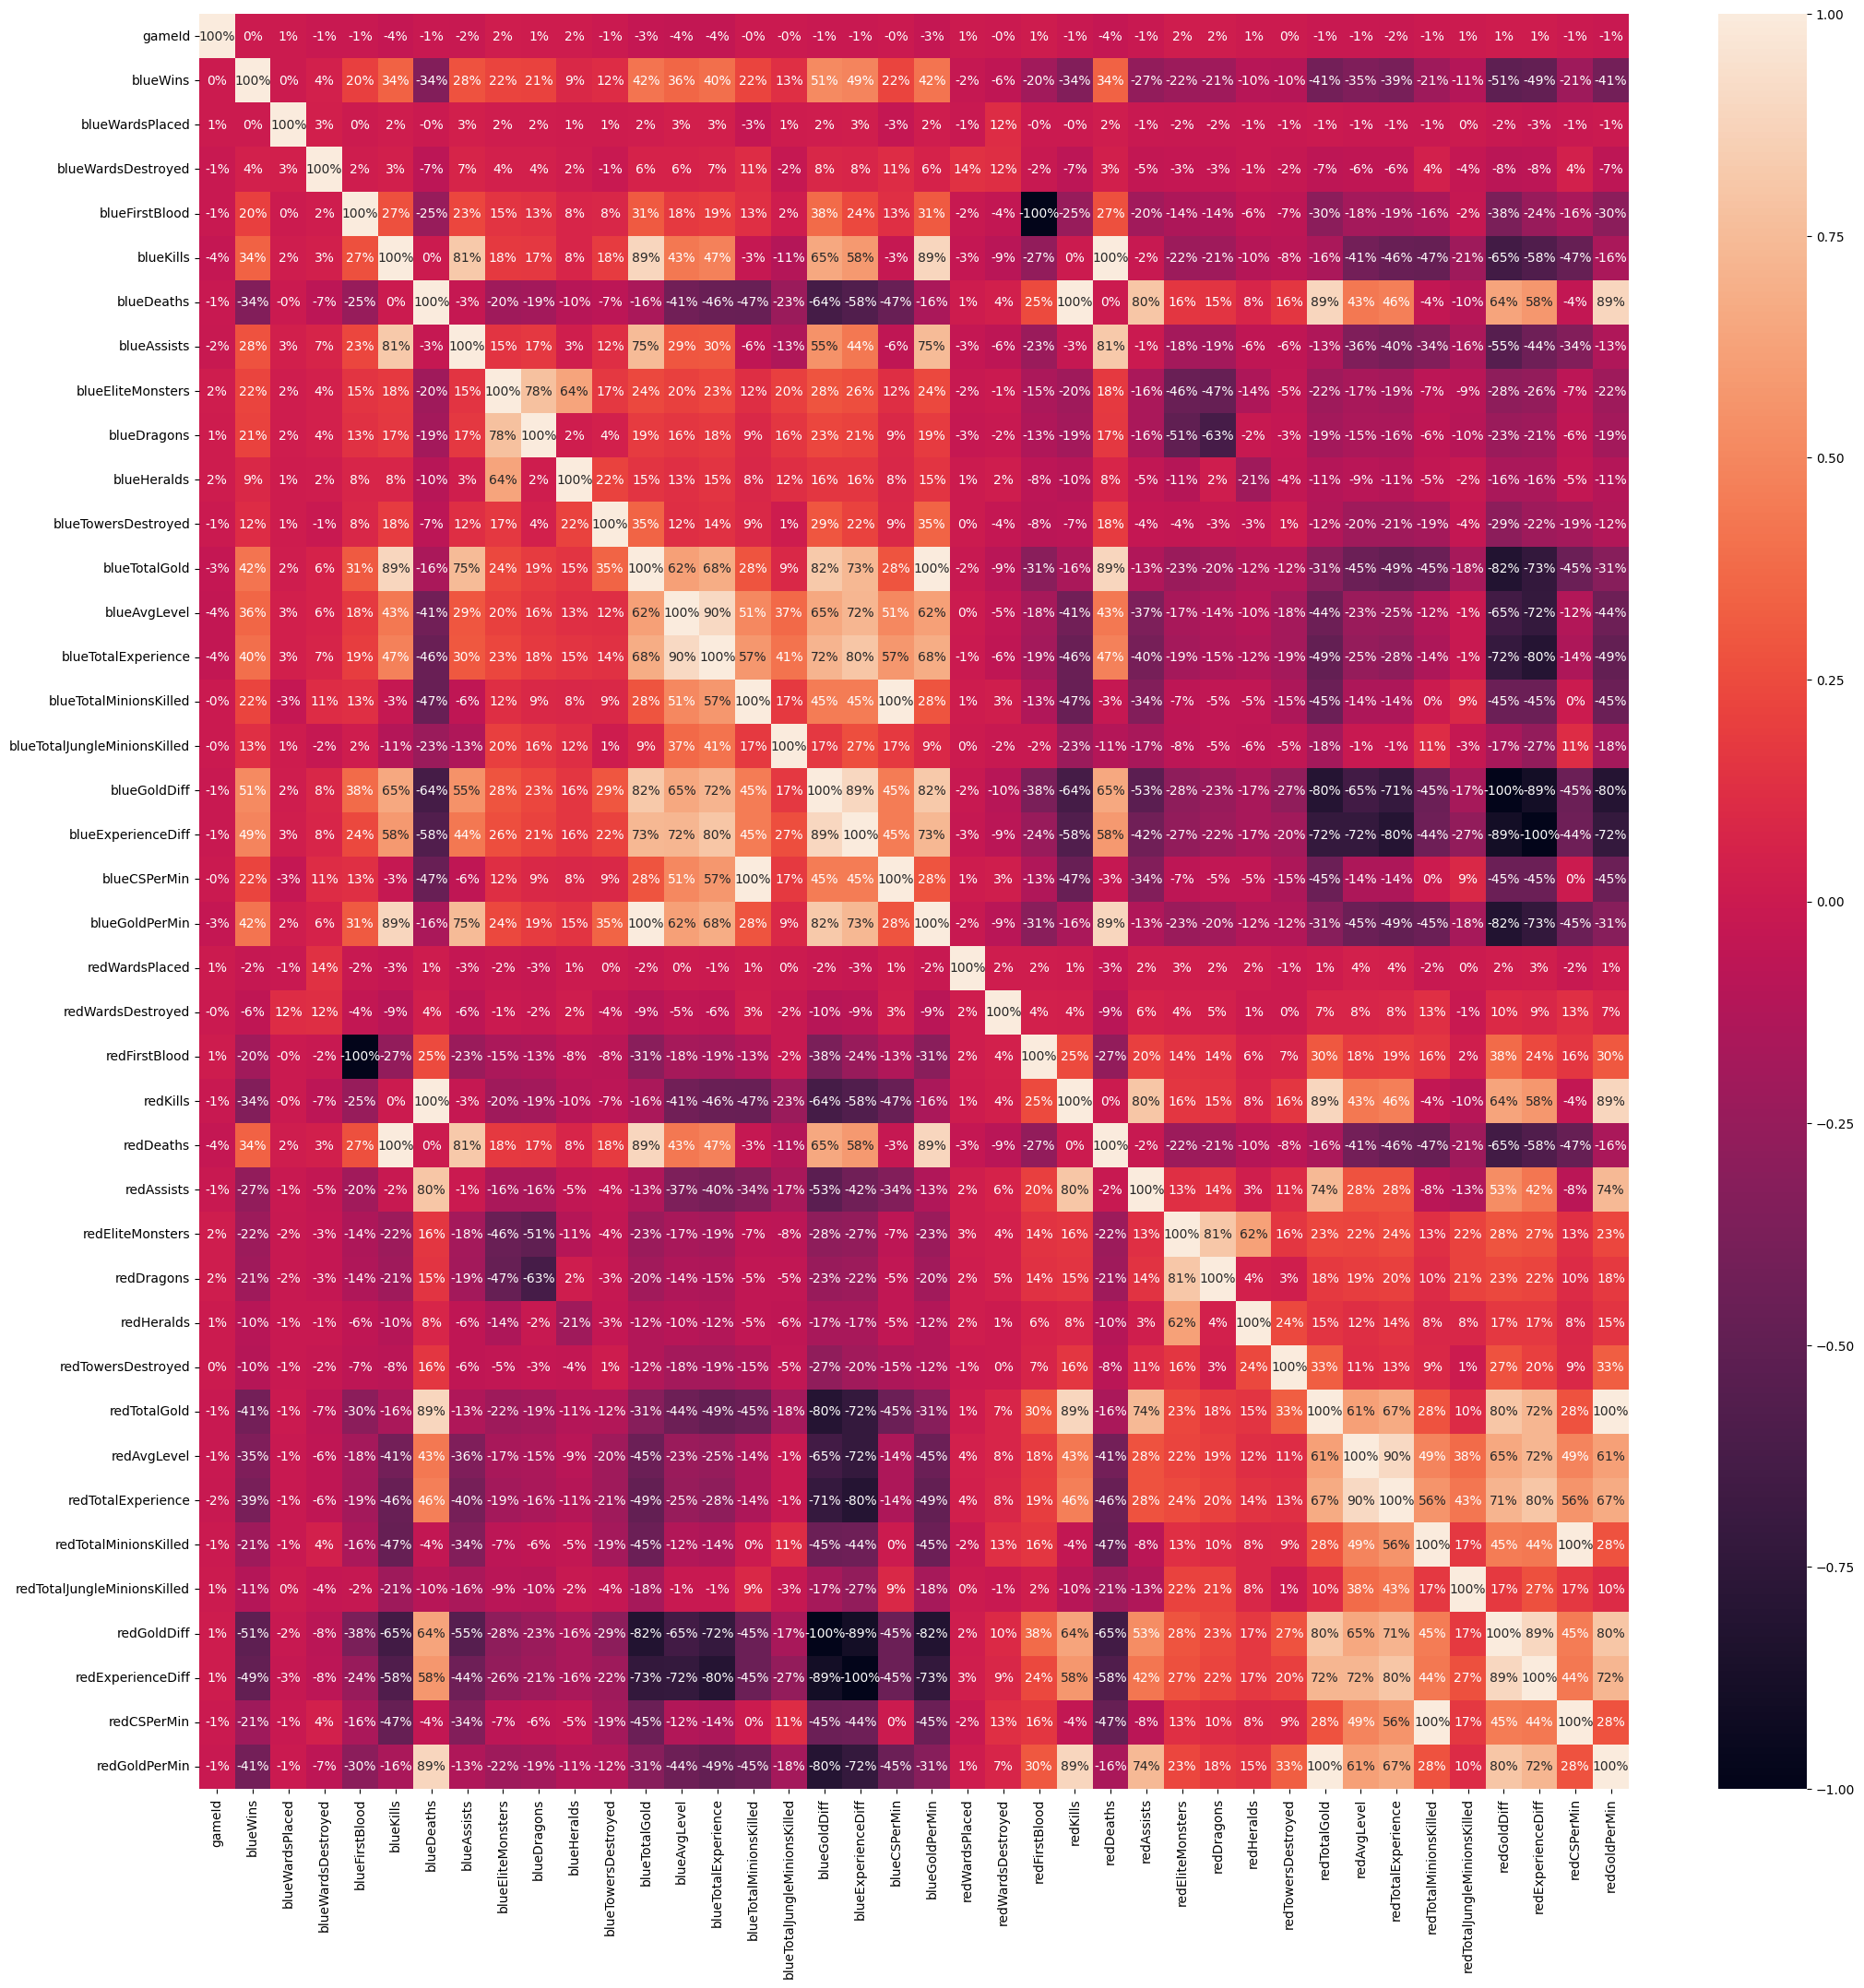

In [6]:
#create a correlation matrix that measures the linear relationships between the variables.
corr = df.corr()
corr

#visualizamos la matriz de correlacion
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, fmt='.0%')
plt.show()

In [7]:
#rankeamos las variables por su correlacion con la variable blueWins
listCorr = corr['blueWins'].sort_values(ascending=False)
listCorr
#seleccionamos las variables con mayor correlacion con la variable blueWins


blueWins                        1.000000
blueGoldDiff                    0.511119
blueExperienceDiff              0.489558
blueTotalGold                   0.417213
blueGoldPerMin                  0.417213
blueTotalExperience             0.396141
blueAvgLevel                    0.357820
blueKills                       0.337358
redDeaths                       0.337358
blueAssists                     0.276685
blueCSPerMin                    0.224909
blueTotalMinionsKilled          0.224909
blueEliteMonsters               0.221944
blueDragons                     0.213768
blueFirstBlood                  0.201769
blueTotalJungleMinionsKilled    0.131445
blueTowersDestroyed             0.115566
blueHeralds                     0.092385
blueWardsDestroyed              0.044247
gameId                          0.000985
blueWardsPlaced                 0.000087
redWardsPlaced                 -0.023671
redWardsDestroyed              -0.055400
redHeralds                     -0.097172
redTowersDestroy

In [15]:
#crear un arbol de decision con las variables seleccionadas y la variable blueWins 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#seleccionamos las variables con mayor correlacion con la variable blueWins
X = df[['blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills', 'blueAssists', 'blueDragons', 'blueTotalGold', 'blueTotalExperience', 'blueTotalMinionsKilled', 'blueCSPerMin', 'blueGoldDiff', 'blueExperienceDiff', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed', 'redAssists', 'redDragons', 'redTotalGold', 'redTotalExperience', 'redTotalMinionsKilled', 'redCSPerMin', 'redGoldDiff', 'redExperienceDiff', 'redGoldPerMin']]
y = df['blueWins']

#separamos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#creamos el modelo
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

#predecimos los datos de prueba
y_pred = model.predict(X_test)

#imprimimos la matriz de confusion
cm = confusion_matrix(y_test, y_pred)
print(cm)

#imprimimos el reporte de clasificacion
print(classification_report(y_test, y_pred))

#imprimimos la precision del modelo
print('Accuracy: ', accuracy_score(y_test, y_pred))



[[647 355]
 [369 605]]
              precision    recall  f1-score   support

           0       0.64      0.65      0.64      1002
           1       0.63      0.62      0.63       974

    accuracy                           0.63      1976
   macro avg       0.63      0.63      0.63      1976
weighted avg       0.63      0.63      0.63      1976

Accuracy:  0.6336032388663968


In [91]:
#definir las variables que se van a utilizar para predecir el resultado de un juego
blueWardsPlaced = 10
blueWardsDestroyed = 1
blueFirstBlood = 1
blueKills = 10
blueAssists = 10
blueDragons = 1
blueTotalGold = 10000
blueTotalExperience = 10000
blueTotalMinionsKilled = 100
blueCSPerMin = 10
blueGoldDiff = 0
blueExperienceDiff = 1000
blueGoldPerMin = 1000
redWardsPlaced = 10
redWardsDestroyed = 1
redAssists = 10
redDragons = 1
redTotalGold = 10000
redTotalExperience = 10000
redTotalMinionsKilled = 100
redCSPerMin = 10
redGoldDiff = 0
redExperienceDiff = 1000
redGoldPerMin = 1000

#predecir el resultado del juego

#seleccionamos las variables con mayor correlacion con la variable blueWins

X = df[['blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills', 'blueAssists', 'blueDragons', 'blueTotalGold', 'blueTotalExperience', 'blueTotalMinionsKilled', 'blueCSPerMin', 'blueGoldDiff', 'blueExperienceDiff', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed', 'redAssists', 'redDragons', 'redTotalGold', 'redTotalExperience', 'redTotalMinionsKilled', 'redCSPerMin', 'redGoldDiff', 'redExperienceDiff', 'redGoldPerMin']]
y = df['blueWins']

#separamos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#creamos el modelo
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

#predecimos los datos de prueba
y_pred = model.predict(X_test)

#imprimimos la matriz de confusion
cm = confusion_matrix(y_test, y_pred)
print(cm)

#imprimimos el reporte de clasificacion
print(classification_report(y_test, y_pred))

#imprimimos la precision del modelo

print('Accuracy: ', accuracy_score(y_test, y_pred))

#predecir el resultado del juego
prediction = model.predict([[blueWardsPlaced, blueWardsDestroyed, blueFirstBlood, blueKills, blueAssists, blueDragons, blueTotalGold, blueTotalExperience, blueTotalMinionsKilled, blueCSPerMin, blueGoldDiff, blueExperienceDiff, blueGoldPerMin, redWardsPlaced, redWardsDestroyed, redAssists, redDragons, redTotalGold, redTotalExperience, redTotalMinionsKilled, redCSPerMin, redGoldDiff, redExperienceDiff, redGoldPerMin]])
print(prediction)

#imprimir el resultado del juego
if prediction == 1:
    print('El equipo azul gana el juego')
else:
    print('El equipo rojo gana el juego')



[[651 351]
 [358 616]]
              precision    recall  f1-score   support

           0       0.65      0.65      0.65      1002
           1       0.64      0.63      0.63       974

    accuracy                           0.64      1976
   macro avg       0.64      0.64      0.64      1976
weighted avg       0.64      0.64      0.64      1976

Accuracy:  0.6411943319838057
[0]
El equipo rojo gana el juego


c:\Users\Adolfo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
